In [1]:
pip install caer canaro

     |████████████████████████████████| 809 kB 926 kB/s            
     |████████████████████████████████| 14.0 MB 38.3 MB/s            
     |████████████████████████████████| 489.6 MB 20 kB/s              
     |████████████████████████████████| 1.3 MB 38.7 MB/s            
     |████████████████████████████████| 463 kB 43.5 MB/s            
     |████████████████████████████████| 2.1 MB 47.5 MB/s            
     |████████████████████████████████| 13.3 MB 46.3 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.2
    Uninstalling tensorflow-2.6.2:
      Successfully uninstalled tensorf

In [2]:
import os
import numpy as np
import cv2 as cv
import canaro
import caer
import gc

In [3]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'


In [4]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path, char)))
                        
# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending = True)
char_dict 

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [5]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count +=1 
    if count >= 10:
        break
characters
    

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [6]:
# Create training data

train = caer.preprocess_from_dir(char_path, characters, channels = channels, IMG_SIZE = IMG_SIZE, isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.674710750579834s
[INFO] At 1000 files
[INFO] 1454 files found in 0.7868742942810059s
[INFO] At 1000 files
[INFO] 1452 files found in 0.8283965587615967s
[INFO] At 1000 files
[INFO] 1354 files found in 0.6056580543518066s
[INFO] At 1000 files
[INFO] 1342 files found in 0.5663082599639893s
[INFO] At 1000 files
[INFO] 1291 files found in 0.4045751094818115s
[INFO] At 1000 files
[INFO] 1206 files found in 0.16517353057861328s
[INFO] At 1000 files
[INFO] 1194 files found in 0.14269709587097168s
[INFO] At 1000 files
[INFO] 1193 files found in 0.18286609649658203s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004319190979003906s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 29s


In [7]:
len(train)

13811

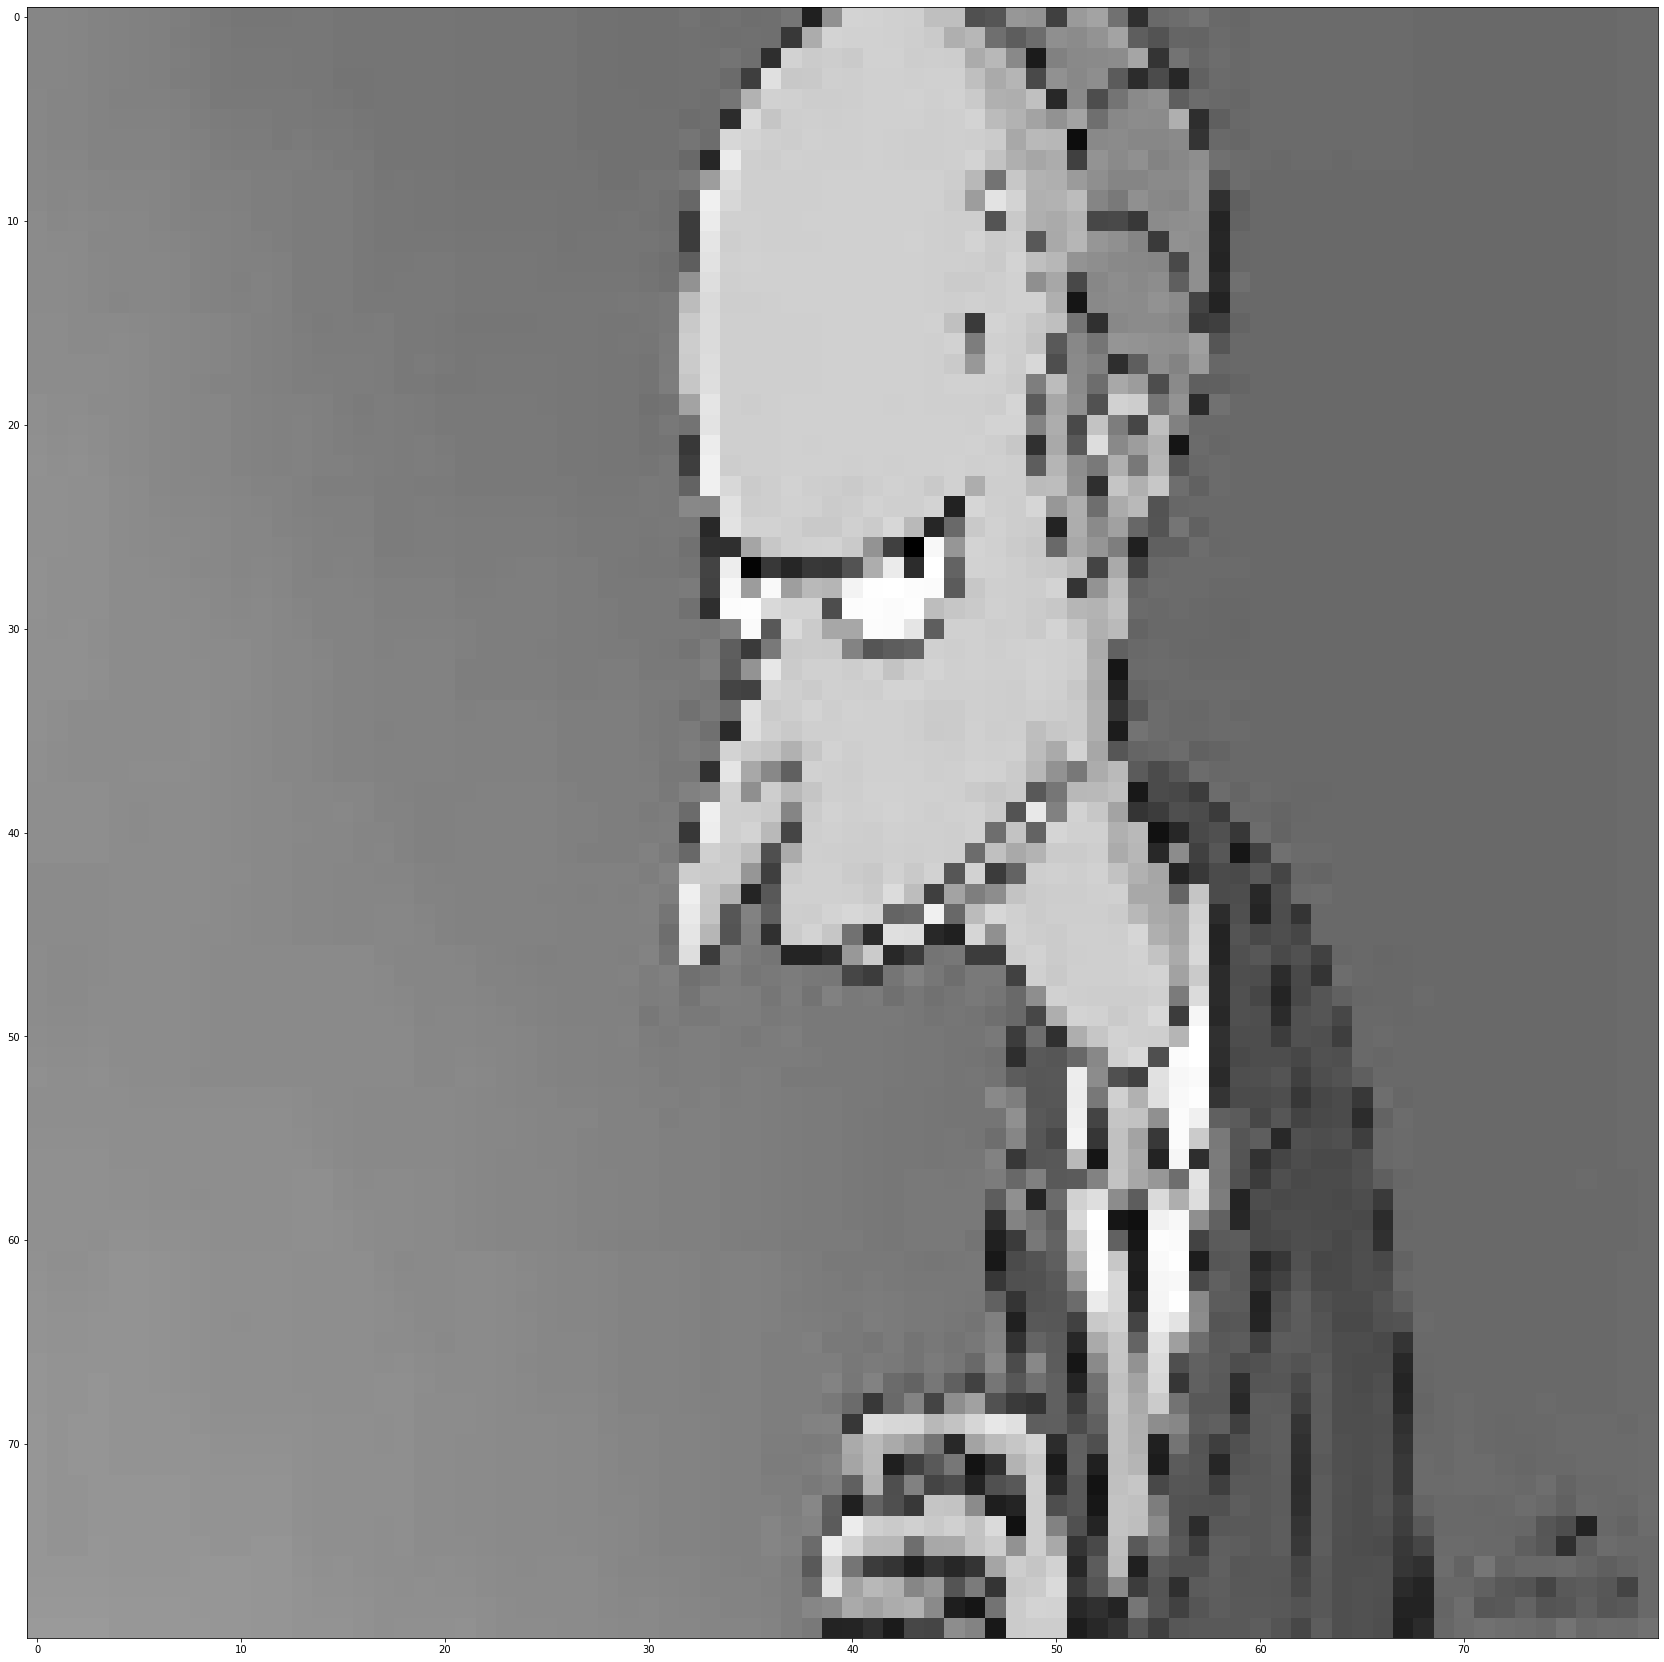

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap = 'gray')
plt.show()

In [9]:
featureSet, labels = caer.sep_train(train, IMG_SIZE = IMG_SIZE)

In [10]:
from tensorflow.keras.utils import to_categorical
# Normalize featureset ==> (0,1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))




In [11]:
x_train, x_validate, y_train, y_validate = caer.train_val_split(featureSet, labels, val_ratio = .2)

In [12]:
del train 
del featureSet
del labels
gc.collect()

21

In [13]:
BATCH_SIZE = 10
EPOCHS = 10

In [14]:
# image data generator

datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [15]:
# creating the model

model = canaro.models.createSimpsonsModel(IMG_SIZE = IMG_SIZE, channels = channels, output_dim = len(characters),
                                            loss = 'binary_crossentropy', decay = 1e-6, learning_rate = 0.001,
                                            momentum = 0.9, nesterov = True)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 39, 39, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 37, 37, 64)        36928     
                                                      

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler
callback_list = [LearningRateScheduler(canaro.lr_schedule)]

In [18]:
training = model.fit(train_gen,
                     steps_per_epoch = len(x_train)//BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_data = (x_validate, y_validate),
                    validation_steps= len(y_validate)//BATCH_SIZE,
                    callbacks = callback_list)

Epoch 1/10
1104/1104 [==============================] - 605s 548ms/step - loss: 0.3303 - accuracy: 0.1557 - val_loss: 0.3298 - val_accuracy: 0.1516 - lr: 0.0100
Epoch 2/10
1104/1104 [==============================] - 587s 532ms/step - loss: 0.3233 - accuracy: 0.1650 - lr: 0.0100
Epoch 3/10
1104/1104 [==============================] - 592s 536ms/step - loss: 0.3115 - accuracy: 0.2107 - lr: 0.0100
Epoch 4/10
1104/1104 [==============================] - 596s 539ms/step - loss: 0.3007 - accuracy: 0.2650 - lr: 0.0100
Epoch 5/10
1104/1104 [==============================] - 598s 542ms/step - loss: 0.2945 - accuracy: 0.2885 - lr: 0.0100
Epoch 6/10
1104/1104 [==============================] - 603s 546ms/step - loss: 0.2871 - accuracy: 0.3215 - lr: 0.0100
Epoch 7/10
1104/1104 [==============================] - 609s 552ms/step - loss: 0.2745 - accuracy: 0.3571 - lr: 0.0100
Epoch 8/10
1104/1104 [==============================] - 601s 544ms/step - loss: 0.2645 - accuracy: 0.4007 - lr: 0.0100
Epoch 